<a href="https://colab.research.google.com/github/KimaruThagna/data-science-in-pycaret/blob/main/BCG_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feauture Engineering


In [ ]:
import pandas as pd
train = pd.read_csv('train_data.csv')
train.drop(['Unnamed: 0'],axis=1,inplace=True)
date_columns = [
                'date_activ',
                'date_end',
                'date_modif_prod',
                'date_renewal',

]
for col in date_columns:
  train[col] = pd.to_datetime(train[col], format='%Y-%m-%d')
  

train.set_index('id')
train

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,1,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,0,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,0,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [ ]:
hist_data = pd.read_csv('hist_data.csv')
hist_data.drop(['Unnamed: 0'],axis=1,inplace=True)
hist_data.set_index('id')
hist_data

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
...,...,...,...,...,...,...,...,...
31373,e95f1188dbc7247fbc0104d283e22dfe,2015-03-01,0.107534,0.094915,0.068714,59.173468,36.490689,8.367731
31374,e95f1188dbc7247fbc0104d283e22dfe,2015-04-01,0.107534,0.094915,0.068714,59.173468,36.490689,8.367731
31375,e95f1188dbc7247fbc0104d283e22dfe,2015-05-01,0.107534,0.094915,0.068714,59.173468,36.490689,8.367731
31376,e95f1188dbc7247fbc0104d283e22dfe,2015-06-01,0.107534,0.094915,0.068714,59.173468,36.490689,8.367731


In [ ]:
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Feature Engineering from Dates

Use consumption data to get 3 month, 6 month and annual averages 

In [ ]:
mean_year = hist_data.groupby(["id"]).mean().reset_index() # annual mean
mean_6m = hist_data[hist_data["price_date"] > "2015-06-01"].groupby(["id"]).mean().reset_index() # mean for last 6 months
mean_3m = hist_data[hist_data["price_date"] > "2015-10-01"].groupby(["id"]).mean().reset_index()# for 3 months
mean_year

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
1,002b3009d069858b471918402fb237b7,0.104044,0.092514,0.065678,59.173468,36.490689,8.367731
2,0030bd55614c2c5e693e04b64faa6445,0.167797,0.086114,0.000000,44.355820,0.000000,0.000000
3,003e7fcd19e10f5114c29ce4a6997ba0,0.157671,0.000000,0.000000,44.883450,0.000000,0.000000
4,003fb333060c256bff67d8d550bff1fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540
...,...,...,...,...,...,...,...
2613,ffb70452760f65e2f4976cef3fc563ff,0.126356,0.105990,0.076216,40.620275,24.372163,16.248110
2614,ffc80b749cc1cd176784a98d42cf83ba,0.150822,0.000000,0.000000,44.463227,0.000000,0.000000
2615,ffcc7d31df48061f5b9e8c14ea462a86,0.123874,0.103821,0.073657,40.773366,24.530684,16.409345
2616,ffe036e88380923f0b016b8a8adc75b3,0.147977,0.000000,0.000000,44.296560,0.000000,0.000000


In [ ]:

mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var",
 "price_p2_var": "mean_year_price_p2_var",
"price_p3_var": "mean_year_price_p3_var",
"price_p1_fix": "mean_year_price_p1_fix",
"price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]
mean_year

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
1,002b3009d069858b471918402fb237b7,0.104044,0.092514,0.065678,59.173468,36.490689,8.367731,59.277512,36.583203,8.433409
2,0030bd55614c2c5e693e04b64faa6445,0.167797,0.086114,0.000000,44.355820,0.000000,0.000000,44.523618,0.086114,0.000000
3,003e7fcd19e10f5114c29ce4a6997ba0,0.157671,0.000000,0.000000,44.883450,0.000000,0.000000,45.041121,0.000000,0.000000
4,003fb333060c256bff67d8d550bff1fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,40.756577,24.482494,16.326318
...,...,...,...,...,...,...,...,...,...,...
2613,ffb70452760f65e2f4976cef3fc563ff,0.126356,0.105990,0.076216,40.620275,24.372163,16.248110,40.746631,24.478154,16.324326
2614,ffc80b749cc1cd176784a98d42cf83ba,0.150822,0.000000,0.000000,44.463227,0.000000,0.000000,44.614049,0.000000,0.000000
2615,ffcc7d31df48061f5b9e8c14ea462a86,0.123874,0.103821,0.073657,40.773366,24.530684,16.409345,40.897240,24.634505,16.483003
2616,ffe036e88380923f0b016b8a8adc75b3,0.147977,0.000000,0.000000,44.296560,0.000000,0.000000,44.444538,0.000000,0.000000


In [ ]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var",
 "price_p2_var": "mean_6m_price_p2_var",
"price_p3_var": "mean_6m_price_p3_var",
"price_p1_fix": "mean_6m_price_p1_fix",
"price_p2_fix": "mean_6m_price_p2_fix",
"price_p3_fix": "mean_6m_price_p3_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]
mean_6m

,id,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3
0,00114d74e963e47177db89bc70108537,0.146184,0.000000,0.000000,44.266930,0.000000,0.000000,44.413114,0.000000,0.000000
1,002b3009d069858b471918402fb237b7,0.101630,0.091216,0.065678,59.173468,36.490689,8.367731,59.275098,36.581905,8.433409
2,0030bd55614c2c5e693e04b64faa6445,0.167409,0.088016,0.000000,44.444710,0.000000,0.000000,44.612119,0.088016,0.000000
3,003e7fcd19e10f5114c29ce4a6997ba0,0.140916,0.000000,0.000000,44.444710,0.000000,0.000000,44.585626,0.000000,0.000000
4,003fb333060c256bff67d8d550bff1fa,0.119475,0.100975,0.074019,40.701733,24.421038,16.280693,40.821208,24.522013,16.354712
...,...,...,...,...,...,...,...,...,...,...
2613,ffb70452760f65e2f4976cef3fc563ff,0.121679,0.103085,0.075477,40.674581,24.404746,16.269831,40.796260,24.507831,16.345308
2614,ffc80b749cc1cd176784a98d42cf83ba,0.149199,0.000000,0.000000,44.659523,0.000000,0.000000,44.808722,0.000000,0.000000
2615,ffcc7d31df48061f5b9e8c14ea462a86,0.120182,0.102215,0.073828,40.980763,24.721788,16.592303,41.100944,24.824002,16.666131
2616,ffe036e88380923f0b016b8a8adc75b3,0.146053,0.000000,0.000000,44.326190,0.000000,0.000000,44.472243,0.000000,0.000000


In [ ]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var",
 "price_p2_var": "mean_3m_price_p2_var",
"price_p3_var": "mean_3m_price_p3_var",
"price_p1_fix": "mean_3m_price_p1_fix",
"price_p2_fix": "mean_3m_price_p2_fix",
"price_p3_fix": "mean_3m_price_p3_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]
mean_3m

,id,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,00114d74e963e47177db89bc70108537,0.145440,0.000000,0.000000,44.266930,0.000000,0.000000,44.412370,0.000000,0.000000
1,002b3009d069858b471918402fb237b7,0.100664,0.090697,0.065678,59.173468,36.490689,8.367731,59.274132,36.581386,8.433409
2,0030bd55614c2c5e693e04b64faa6445,0.166638,0.087890,0.000000,44.444710,0.000000,0.000000,44.611348,0.087890,0.000000
3,003e7fcd19e10f5114c29ce4a6997ba0,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000
4,003fb333060c256bff67d8d550bff1fa,0.118175,0.100491,0.074516,40.728885,24.437330,16.291555,40.847060,24.537821,16.366071
...,...,...,...,...,...,...,...,...,...,...
2612,ffb70452760f65e2f4976cef3fc563ff,0.118175,0.100491,0.074516,40.728885,24.437330,16.291555,40.847060,24.537821,16.366071
2613,ffc80b749cc1cd176784a98d42cf83ba,0.149400,0.000000,0.000000,45.444710,0.000000,0.000000,45.594110,0.000000,0.000000
2614,ffcc7d31df48061f5b9e8c14ea462a86,0.118238,0.101781,0.074205,41.395552,25.103997,16.958222,41.513790,25.205778,17.032427
2615,ffe036e88380923f0b016b8a8adc75b3,0.145047,0.000000,0.000000,44.444710,0.000000,0.000000,44.589757,0.000000,0.000000


In [ ]:
#combine all data frames
features = pd.merge(mean_year,mean_6m, on="id")
features = pd.merge(features,mean_3m, on="id")
features = mean_year
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
1,002b3009d069858b471918402fb237b7,0.104044,0.092514,0.065678,59.173468,36.490689,8.367731,59.277512,36.583203,8.433409
2,0030bd55614c2c5e693e04b64faa6445,0.167797,0.086114,0.000000,44.355820,0.000000,0.000000,44.523618,0.086114,0.000000
3,003e7fcd19e10f5114c29ce4a6997ba0,0.157671,0.000000,0.000000,44.883450,0.000000,0.000000,45.041121,0.000000,0.000000
4,003fb333060c256bff67d8d550bff1fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,40.756577,24.482494,16.326318
...,...,...,...,...,...,...,...,...,...,...
2613,ffb70452760f65e2f4976cef3fc563ff,0.126356,0.105990,0.076216,40.620275,24.372163,16.248110,40.746631,24.478154,16.324326
2614,ffc80b749cc1cd176784a98d42cf83ba,0.150822,0.000000,0.000000,44.463227,0.000000,0.000000,44.614049,0.000000,0.000000
2615,ffcc7d31df48061f5b9e8c14ea462a86,0.123874,0.103821,0.073657,40.773366,24.530684,16.409345,40.897240,24.634505,16.483003
2616,ffe036e88380923f0b016b8a8adc75b3,0.147977,0.000000,0.000000,44.296560,0.000000,0.000000,44.444538,0.000000,0.000000


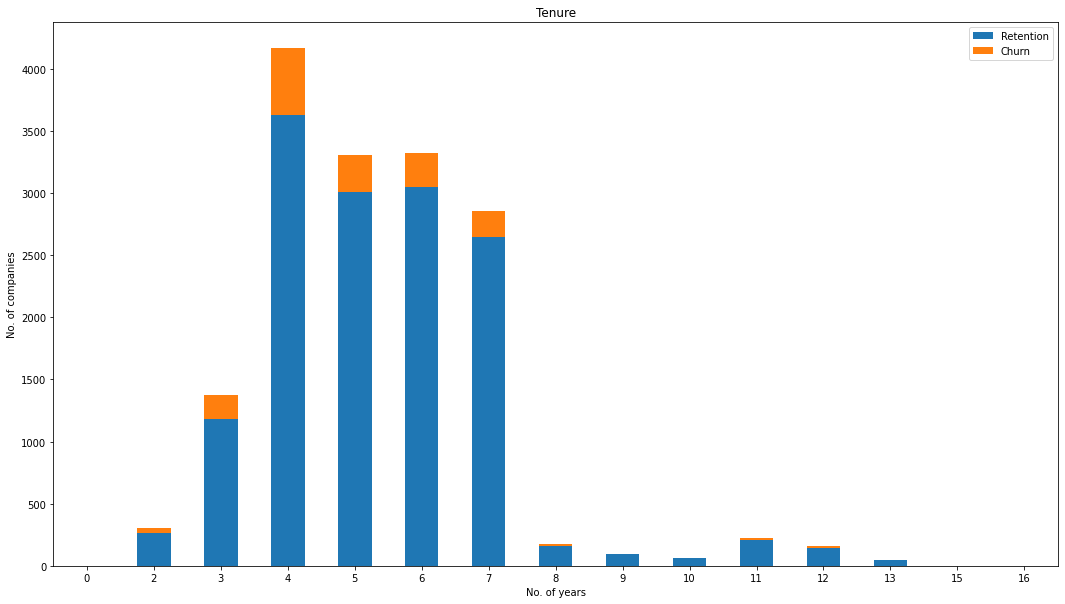

In [ ]:
# tenure = date_end -date_activ- How many years has the customer been with our client
train["tenure"] = ((train["date_end"]-train["date_activ"])/ np.timedelta64(1, "Y")).astype(int)


tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of companies")
plt.xlabel("No. of years")
plt.show()

# Graph Interpretation

Churn is most prevalent for clients whose tenure is 3 to 7 years. New(1 year) or very old(13, 9, 10 yrs) clents seem to have little to no problem at all

# Feature engineering using date data
months_activ : Number of months active until reference date (Jan 2016)

months_to_end : Number of months of the contract left at reference date (Jan 2016)

months_modif_prod : Number of months since last modification at reference date (Jan 2016)

months_renewal : Number of months since last renewal at reference date (Jan 2016)

In [ ]:
def convert_months(reference_date, dataframe, column):
 
 time_delta = REFERENCE_DATE - dataframe[column]
 months = (time_delta / np.timedelta64(1, "M")).astype(int)
 return months

REFERENCE_DATE = datetime.datetime(2016,1,1)

train["months_activ"] = convert_months(REFERENCE_DATE, train, "date_activ")
train["months_to_end"] = -convert_months(REFERENCE_DATE, train, "date_end")
train["months_modif_prod"] = convert_months(REFERENCE_DATE, train, "date_modif_prod")
train["months_renewal"] = convert_months(REFERENCE_DATE, train, "date_renewal")

In [ ]:
def plot_churn_by_month(dataframe, column, fontsize_=11):
 
 temp = dataframe[[column, "churn", "id"]].groupby([column, "churn"])["id"].count().unstack(level=1)
 temp.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
 rot=30,
 title= column)
 # Rename legend
 plt.legend(["Retention", "Churn"], loc="upper right")
 # Labels
 plt.ylabel("No. of companies")
 plt.xlabel("No. of months")
 # Set xlabel fontsize
 plt.xticks()
 plt.show()

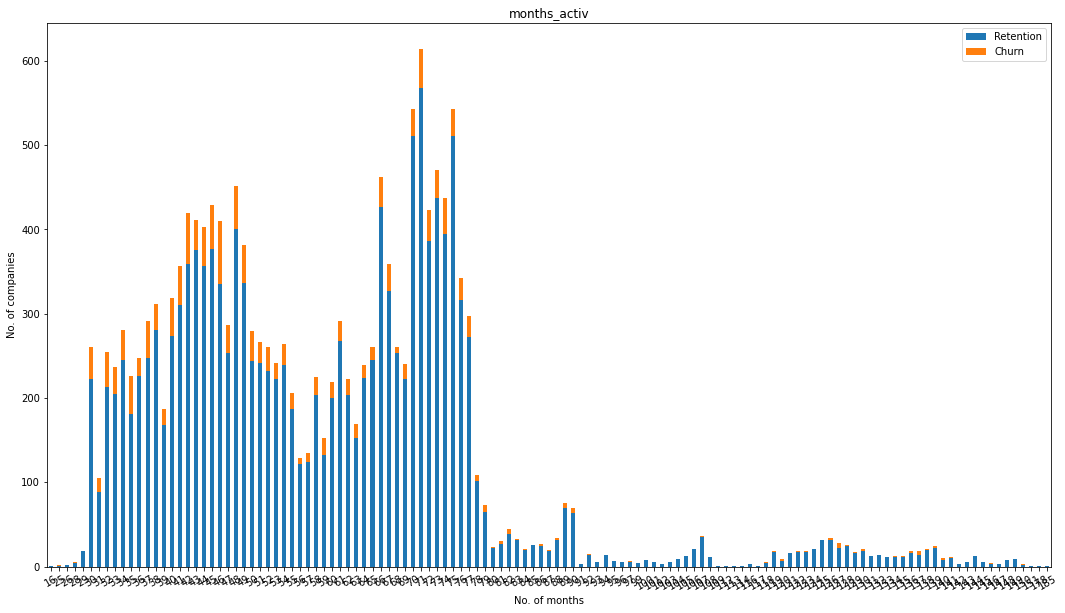

In [ ]:
plot_churn_by_month(train, "months_activ", 7)

# Interpretation
It can be seen that clients with less active months in their contract  to the reference date are more likely to churn. This may be that they feel it is okay to leave whatever value is left in the contract before time fuly lapses

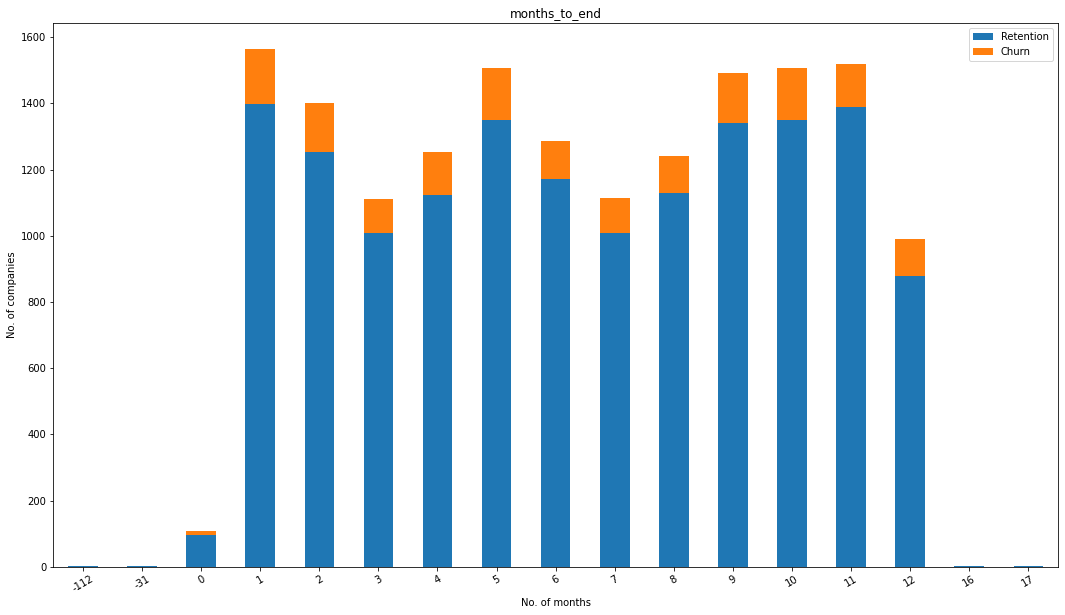

In [ ]:
plot_churn_by_month(train, 'months_to_end') # number of months left in the contract as of jan 2016

In [ ]:
# one hot encode categorical variable channel sales
train["channel_sales"] = train["channel_sales"].fillna("null_values_channel")
# Transform to categorical data type
train["channel_sales"] = train["channel_sales"].astype("category")
 # inspect number of items per category
train["channel_sales"].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    7377
null_values_channel                 4218
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [ ]:
# Create dummy variables
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")
# Rename columns for simplicity
categories_channel.columns = [col_name[:11] for col_name in categories_channel.columns]
categories_channel.drop(columns=["channel_nul"],inplace=True)
categories_channel

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
16091,0,0,0,1,0,0,0
16092,0,0,0,1,0,0,0
16093,0,0,0,1,0,0,0
16094,0,0,0,1,0,0,0


In [ ]:
# same for originup
train["origin_up"] = train["origin_up"].fillna("null_values_origin")
train["origin_up"] = train["origin_up"].astype("category")
# Create dummy variables
categories_origin = pd.get_dummies(train["origin_up"], prefix = "origin")
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]
categories_origin

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
16091,0,0,0,1,0
16092,0,0,0,1,0
16093,0,0,0,1,0
16094,0,0,0,1,0


In [ ]:
# merge newly created columns
train = pd.merge(train, categories_channel, left_index=True, right_index=True)
train = pd.merge(train, categories_origin, left_index=True, right_index=True)
train.drop(columns=["channel_sales", "origin_up"],inplace=True)

# Skewness of the Data
The data is highly skewed to the right as determined by box plots.
Since predictive and classification models assume data is normally distributed, our data's nature may bring bias in our model.
To solve this, we use log transformation to achieve normal or near normal distribution.

In [ ]:
# log tranformation doesnt work with negative data. Remove by replacing with NaN
train.loc[train.cons_12m < 0,"cons_12m"] = np.nan
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
train.loc[train.cons_last_month < 0,"cons_last_month"] = np.nan
train.loc[train.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
train.loc[train.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan

# since log tranforms cannot work on 0 values, apply a constant k=1
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1)
train["cons_last_month"] = np.log10(train["cons_last_month"]+1)
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1)
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1)
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1)
train["imp_cons"] = np.log10(train["imp_cons"]+1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

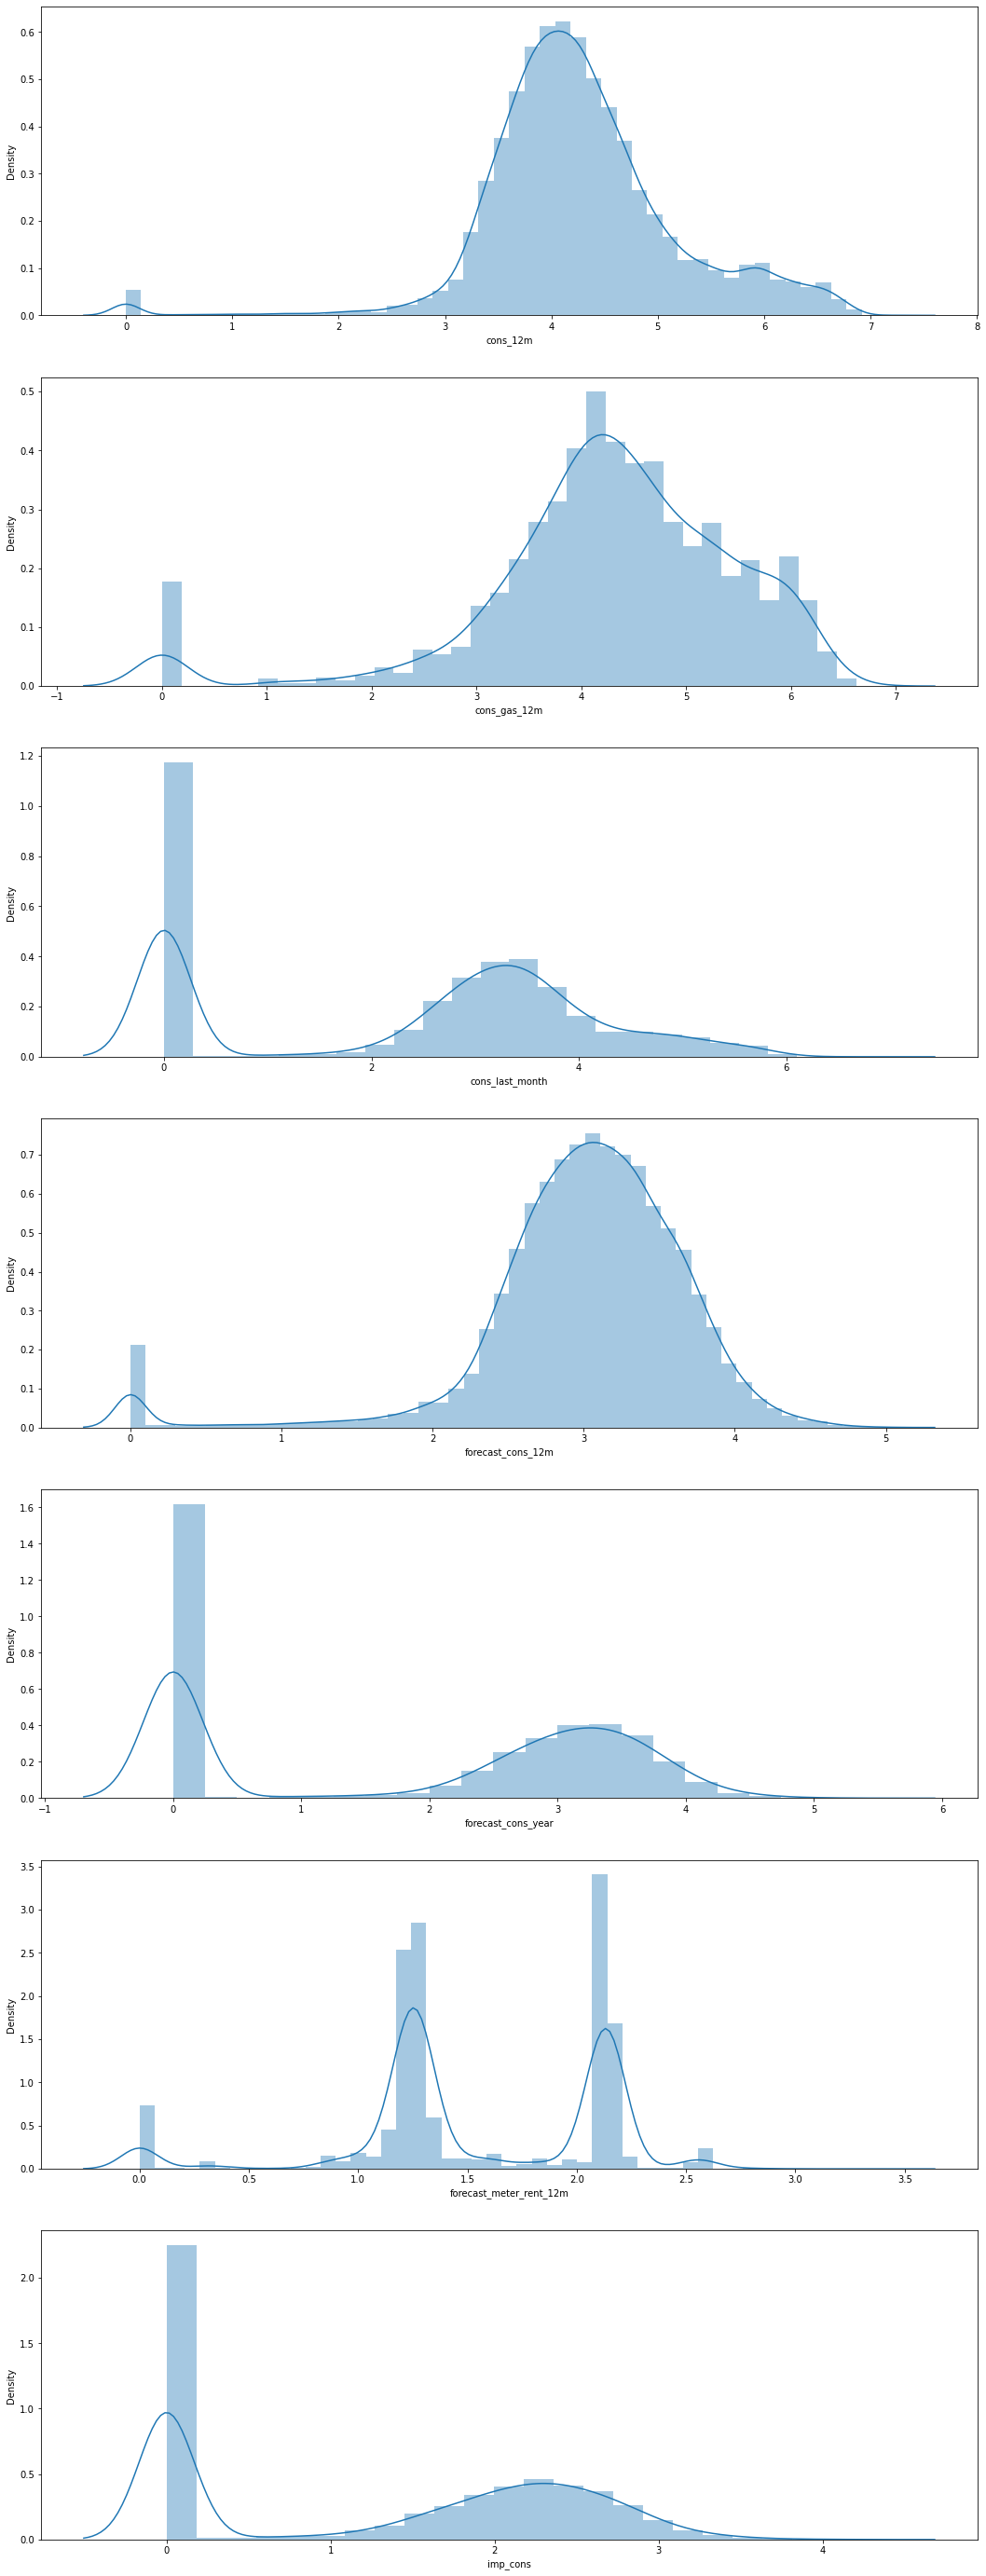

In [ ]:
# visualize distribution
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0])
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

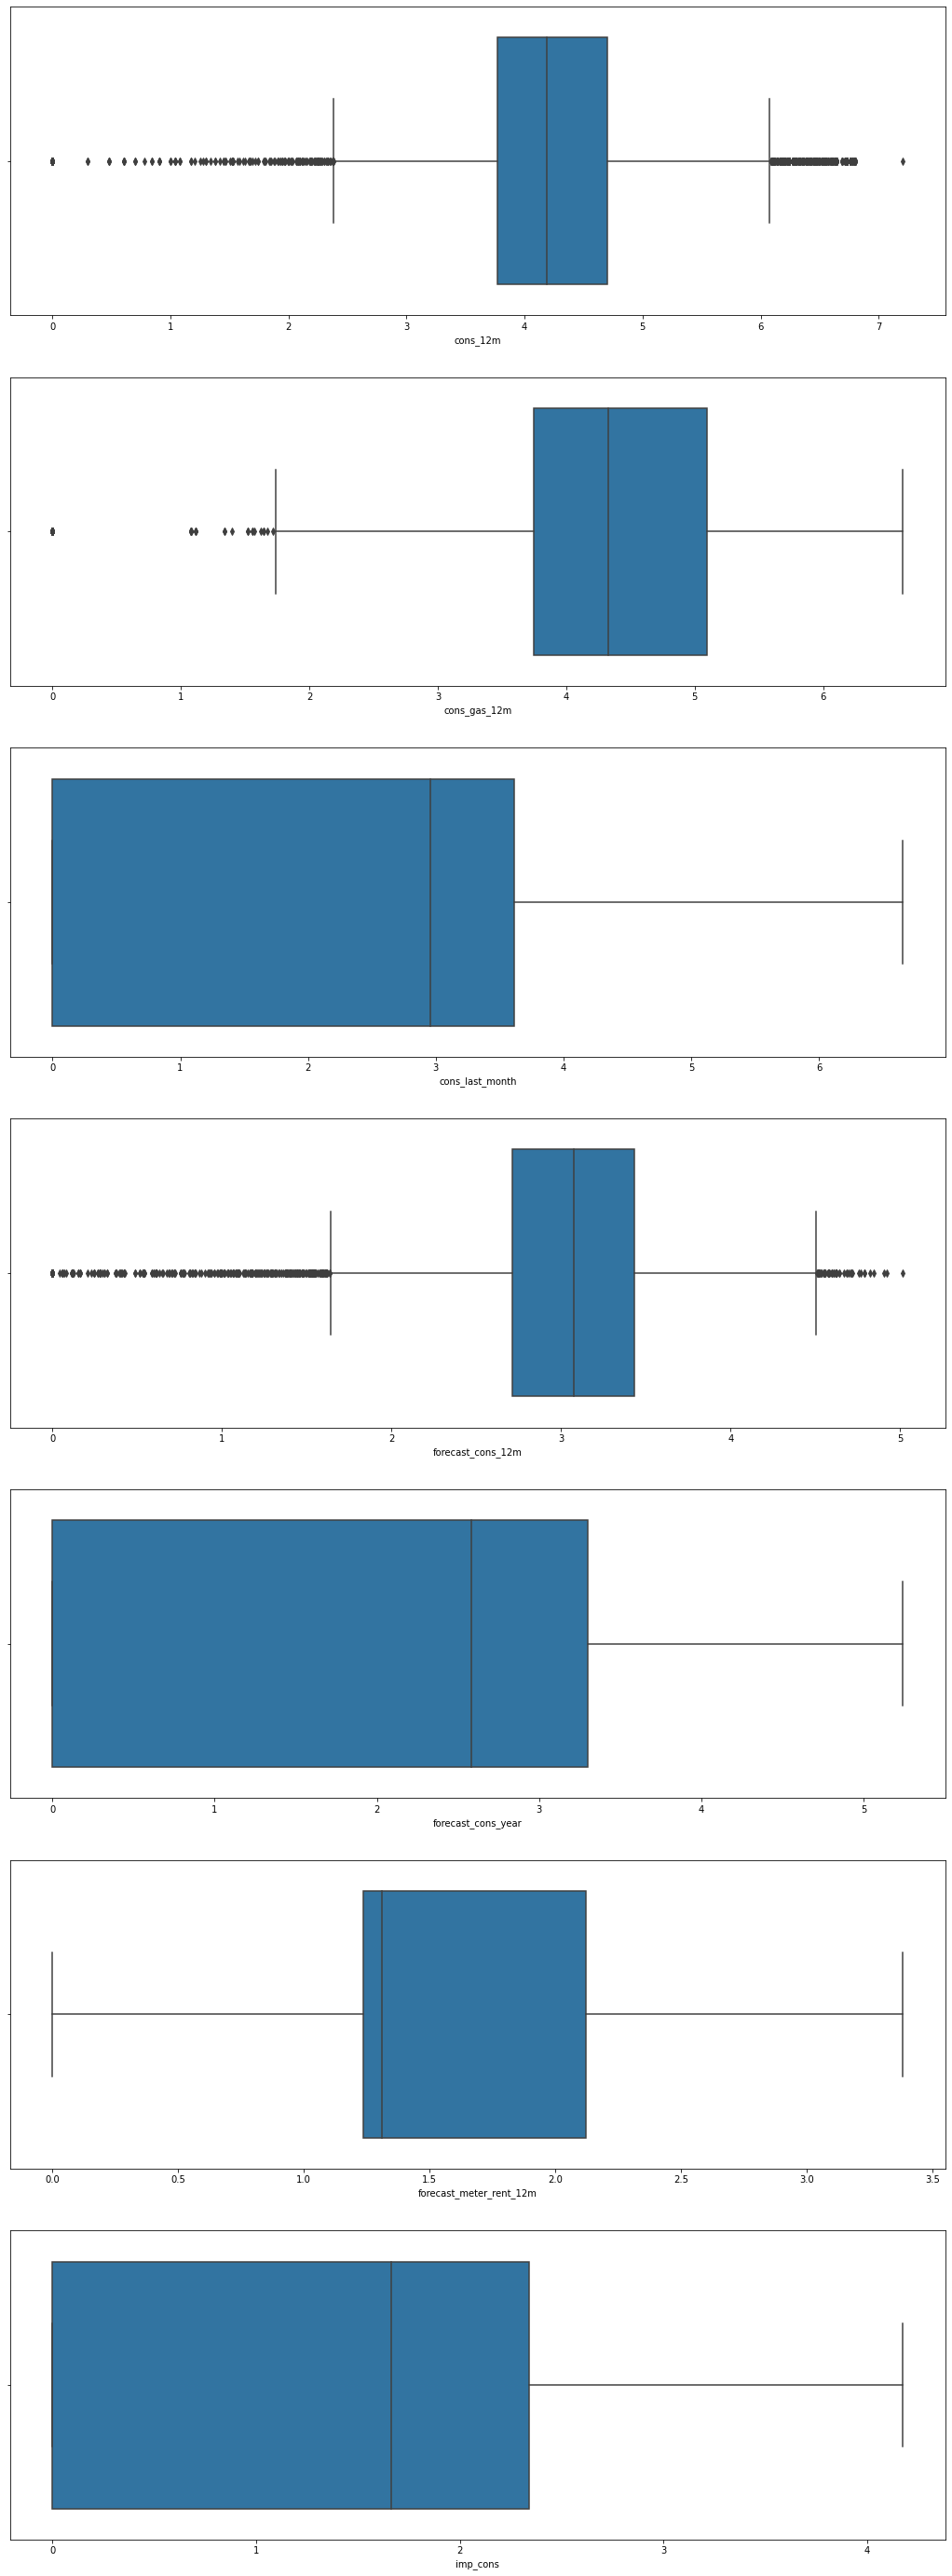

In [ ]:
# check for skewness with boxplots
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

# Interpretation
Closer to normal distribution. Presence of out of range values. May be outliers.

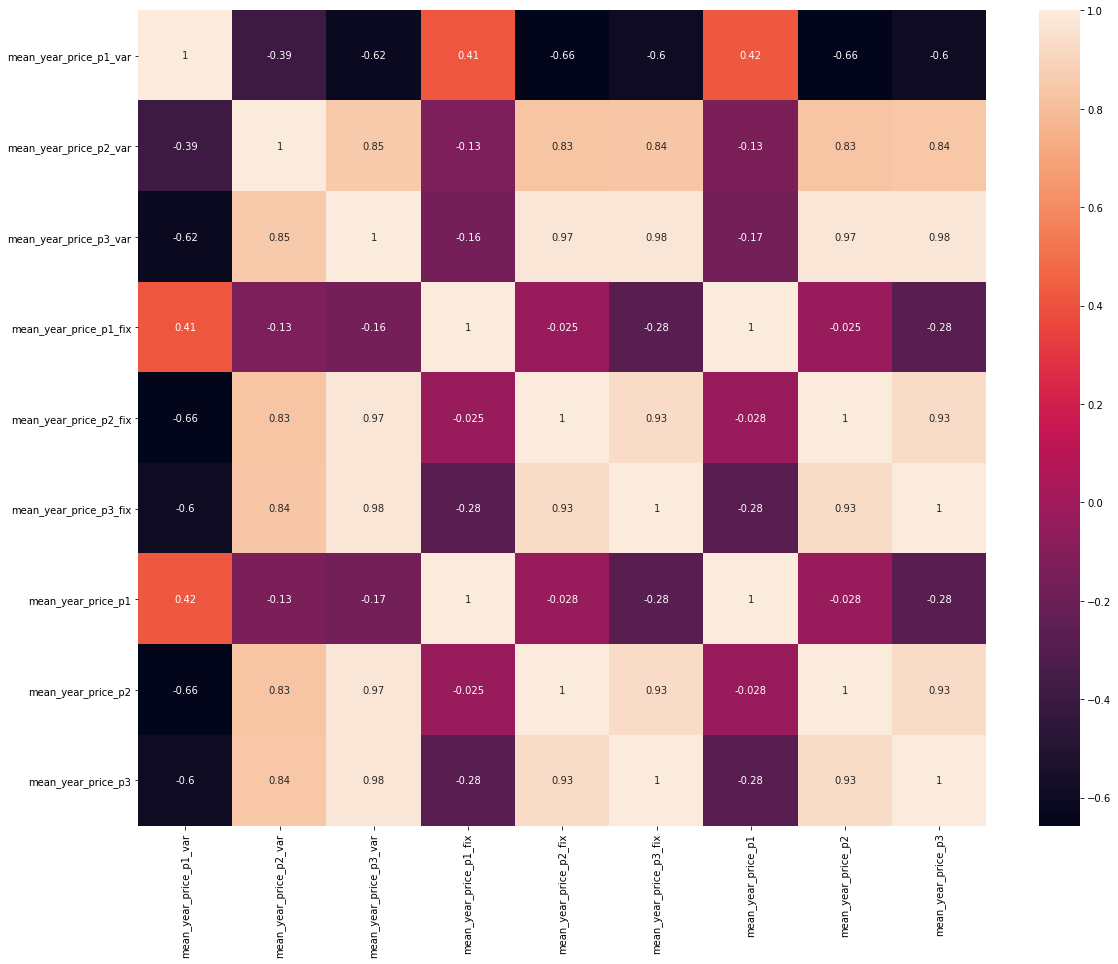

In [ ]:
# Calculate correlation of variables
correlation = features.corr()
plt.figure(figsize=(19,15))
sns.heatmap(correlation, annot=True)
plt.show()


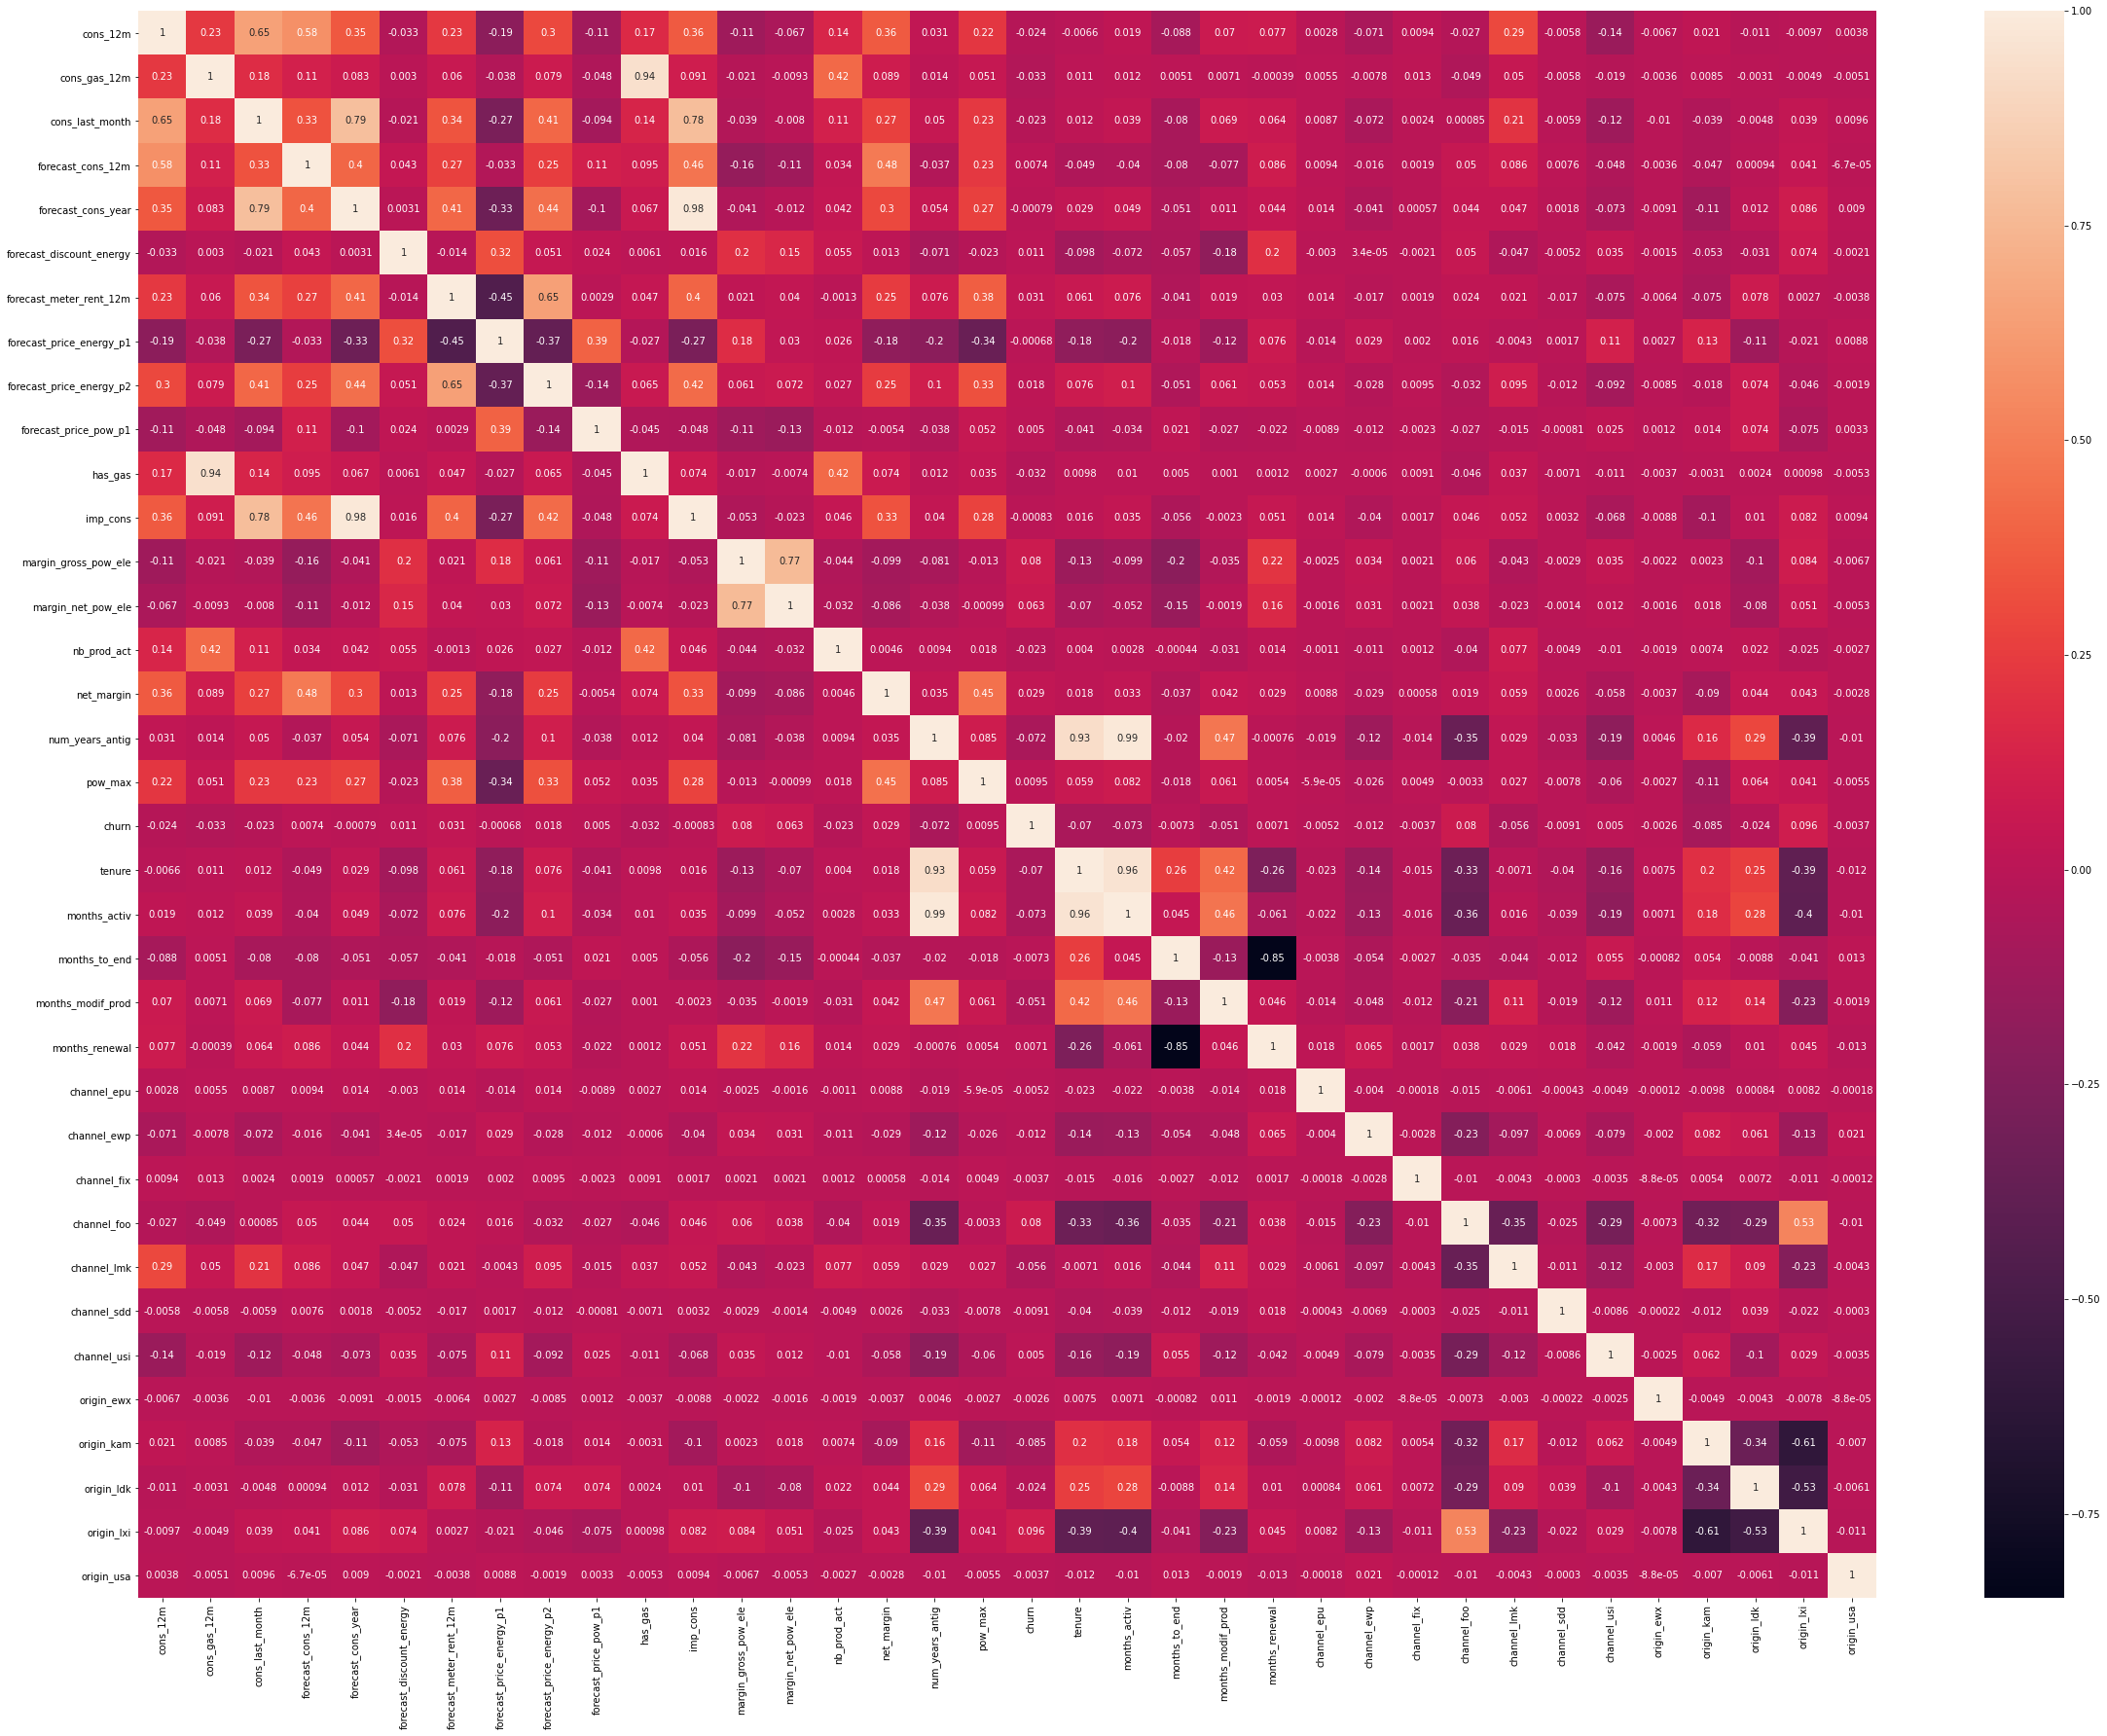

In [ ]:
# for train data
# Calculate correlation of variables
correlation = train.corr()
plt.figure(figsize=(40,30))
sns.heatmap(correlation, annot=True)
plt.show()

# Multicolleniarity effect
Highly correlated variables(can predict one from the other) can lead to skewed results and thus should be removed.

num_years_antig has a high correlation with months_activ (it provides us the same information).
We can remove variables with very high correlation.

In [ ]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

# Outliers
Can be dscribed as 

1. Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile

2. Data point that falls outside of 3 standard deviations.

## Dealing with outliers
Removing them (this works well for massive datasets)
Replacing them with sensible data (works better when the dataset is not that big).


We will replace the outliers with the mean (average of the values excluding outliers).

In [ ]:
def replace_outliers_z_score(dataframe, column, Z=3): # 3 points from the mean
 
 from scipy.stats import zscore

 df = dataframe.copy(deep=True)
 df.dropna(inplace=True, subset=[column])

 # Calculate mean without outliers
 df["zscore"] = zscore(df[column])
 mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean() # get mean of values that are not outliers

 # Replace with mean values
 dataframe[column] = dataframe[column].fillna(mean_)
 dataframe["zscore"] = zscore(dataframe[column])
 no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
 dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

 # Print message
 print("Replaced:", no_outliers, " outliers in ", column)
 return dataframe.drop(columns="zscore")

for c in features.columns:
  if c != "id":
    features = replace_outliers_z_score(features, c)

Replaced: 40  outliers in  mean_year_price_p1_var
Replaced: 0  outliers in  mean_year_price_p2_var
Replaced: 0  outliers in  mean_year_price_p3_var
Replaced: 127  outliers in  mean_year_price_p1_fix
Replaced: 0  outliers in  mean_year_price_p2_fix
Replaced: 0  outliers in  mean_year_price_p3_fix
Replaced: 127  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [ ]:
features.reset_index(drop=True, inplace=True)

In [ ]:
#Other methods of dealing with outliers
#Using IQR method
def _find_outliers_iqr(dataframe, column):
 """
 Find outliers using the 1.5*IQR rule.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column

 Returns
 -------
 Dict
 With the values of the iqr, lower_bound and upper_bound
 """
 col = sorted(dataframe[column])
 q1, q3= np.percentile(col,[25,75])
 iqr = q3 - q1
 lower_bound = q1 -(1.5 * iqr)
 upper_bound = q3 +(1.5 * iqr)
 results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
 return results
def remove_outliers_iqr(dataframe, column):
 """
 Remove outliers using the 1.5*IQR rule.
 Parameters
 ----------
 dataframe : pandas dataframe
 Contains the data where the outliers are to be found
 column : str
 Usually a string with the name of the column

 Returns
 -------
 Dataframe
 With outliers under the lower and above the upper bound removed
 """

 outliers = _find_outliers_iqr(dataframe, column)
 removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
 (dataframe[column] > outliers["upper_bound"])].shape

 dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
 (dataframe[column] < outliers["upper_bound"])]
 print("Removed:", removed[0], " outliers")
 return dataframe


In [ ]:
# replace outliers in Train data
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m")
#train = replace_outliers_z_score(train,"forecast_cons_year")
train = replace_outliers_z_score(train,"forecast_discount_energy")
train = replace_outliers_z_score(train,"forecast_meter_rent_12m")
train = replace_outliers_z_score(train,"forecast_price_energy_p1")
train = replace_outliers_z_score(train,"forecast_price_energy_p2")
train = replace_outliers_z_score(train,"forecast_price_pow_p1")
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele")
train = replace_outliers_z_score(train,"margin_net_pow_ele")
train = replace_outliers_z_score(train,"net_margin")
train = replace_outliers_z_score(train,"pow_max")
train = replace_outliers_z_score(train,"months_activ")
train = replace_outliers_z_score(train,"months_to_end")
train = replace_outliers_z_score(train,"months_modif_prod")
train = replace_outliers_z_score(train,"months_renewal")

Replaced: 174  outliers in  cons_12m
Replaced: 118  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 425  outliers in  forecast_cons_12m
Replaced: 575  outliers in  forecast_discount_energy
Replaced: 1  outliers in  forecast_meter_rent_12m
Replaced: 300  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 240  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  imp_cons
Replaced: 238  outliers in  margin_gross_pow_ele
Replaced: 220  outliers in  margin_net_pow_ele
Replaced: 185  outliers in  net_margin
Replaced: 293  outliers in  pow_max
Replaced: 462  outliers in  months_activ
Replaced: 2  outliers in  months_to_end
Replaced: 156  outliers in  months_modif_prod
Replaced: 133  outliers in  months_renewal


In [ ]:
train.reset_index(drop=True, inplace=True)

# Box plots after outlier removal


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

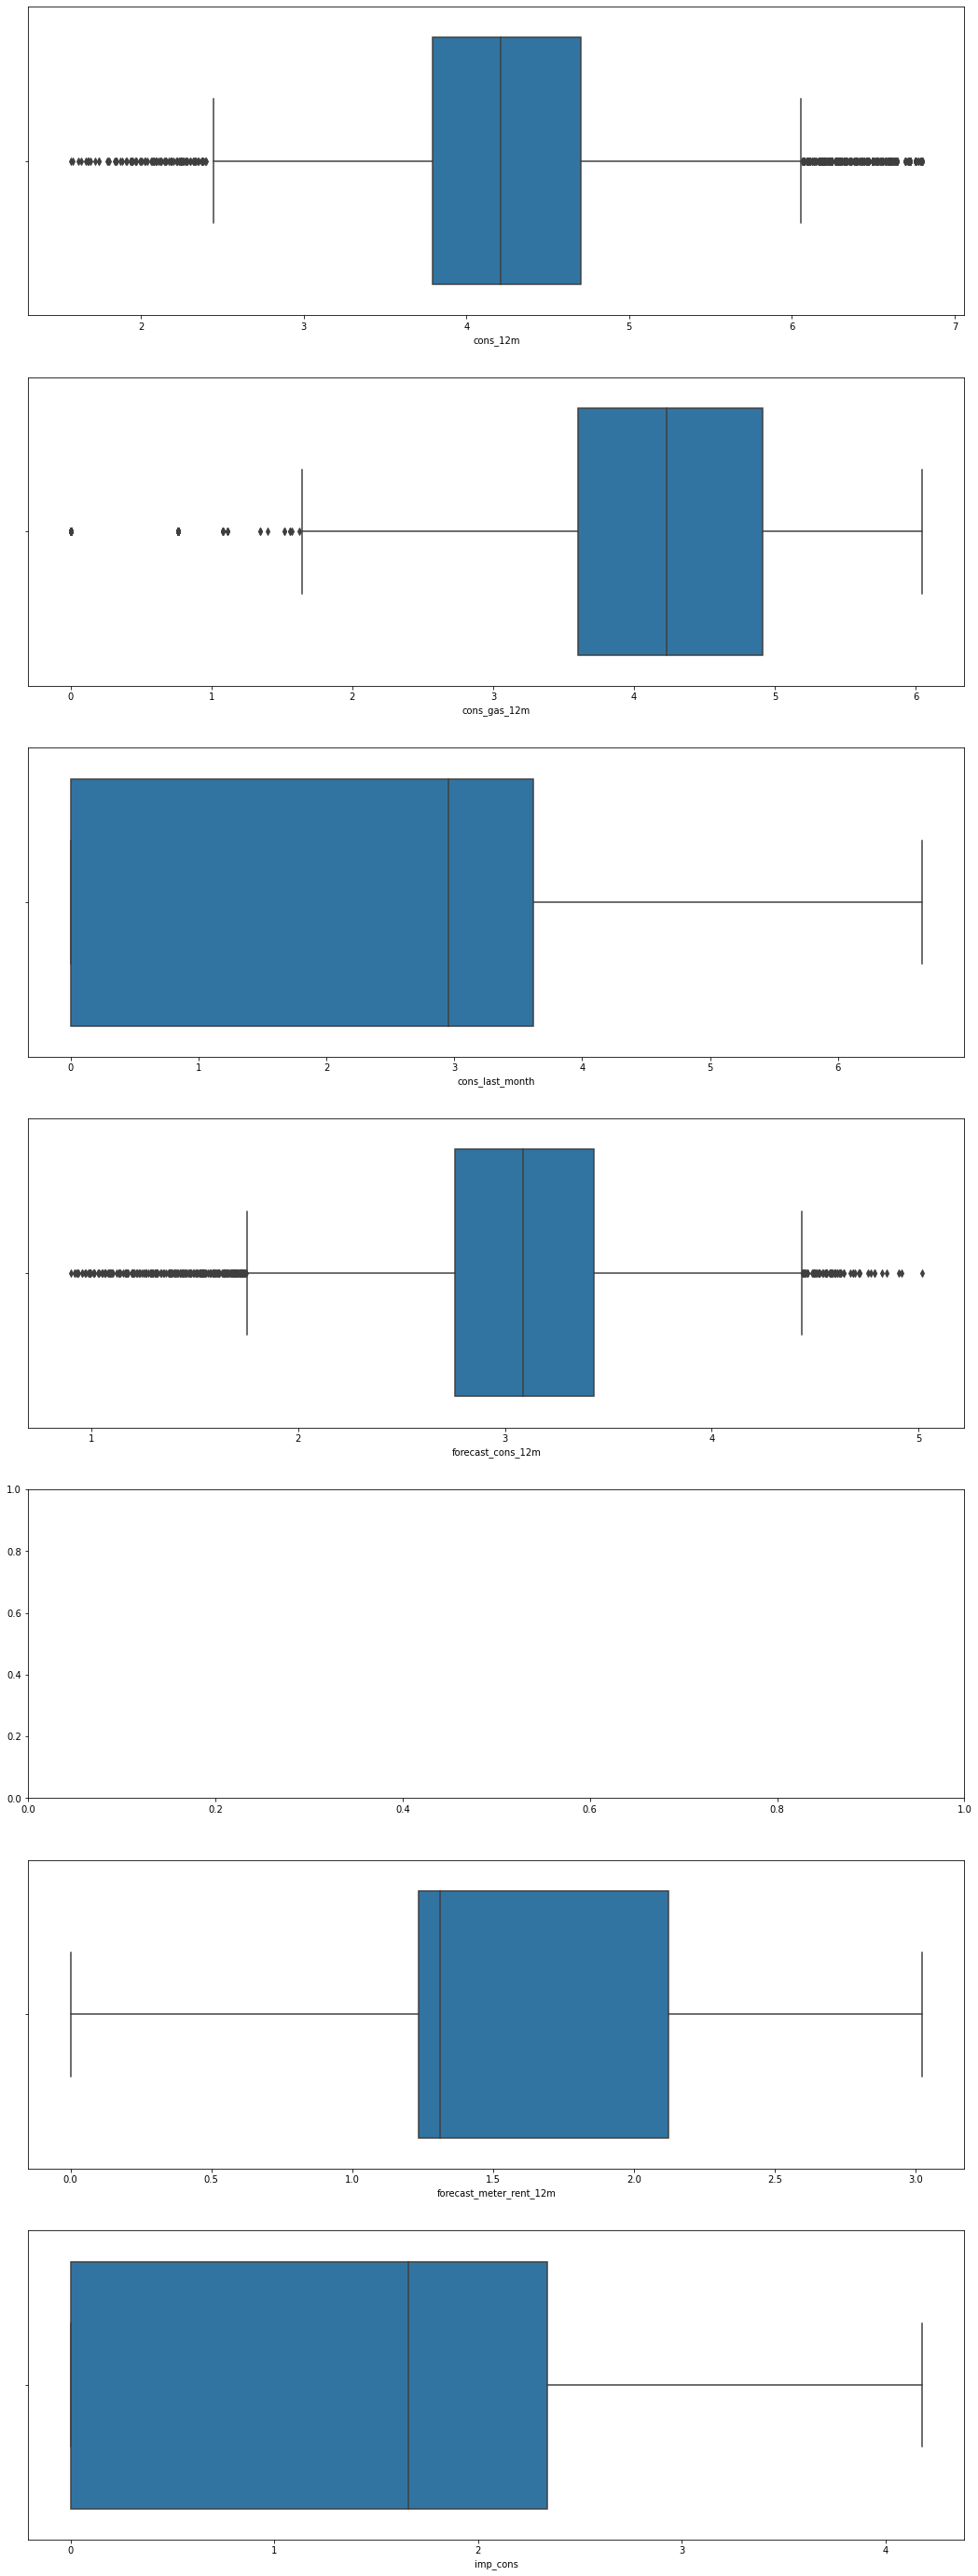

In [ ]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

#Interpretation
Most outliers have been cleaned.
Some still persist but not many in number and hence, the effect on the model wont be as bad

In [ ]:
train.to_csv('finat_train.csv')

In [ ]:
hist_data.to_csv('final_hist.csv')